# CPSC 330 final exam

The University of British Columbia

Instructor: Mike Gelbart

April 24, 2020

## Instructions

#### What is / is not allowed.

- This exam is open book. You are welcome to consult the course materials, online resources, etc.
- You are allowed to copy/adapt/reuse code from the course materials (lectures, my homework solutions, your homework solutions) **with attribution**.
  - For each of the coding questions, there is a section underneath that asks you to list the resources you borrowed code from. 
  - Using code from the course materials without attribution may be considered academic misconduct.
- You are **not** allowed to copy/adapt/reuse code from anywhere other than course materials.
  - Using code from anywhere other than the course materials will be considered academic misconduct.
- You are **not** allowed to copy text, visualizations, or anything other than code from anywhere.
- You are **not** allowed to communicate with **anyone else, in any way** during the exam. 
  - This includes talking in-person, phone, text, chat apps, screen sharing, email, sharing your notebook, or any form of communication. 
  - This restriction applies to any other person, regardless of whether or not they are enrolled in CPSC 330.

#### Submission instructions.

- You will receive and submit your exam notebook the same way you submit your homework, through github.students.cs.ubc.ca. 
- As with the homework assignments, **you must ensure that all your code outputs (scores, tables, figures, etc.) are displayed in the notebook**. For example, if you are required to calculate some value, it is not sufficient to just store the value to a variable, nor is it sufficient to have a `print(value)` in your code - the print code must actually be run and the notebook saved, so that the output is shown on the screen when the notebook is rendered. This allows us see your results without running your code. 
  - When you are done, take a look at your rendered notebook in a web browser at github.students.cs.ubc.ca, to make sure all the output is displayed properly.
- **It is essential that you commit and push your work to GitHub frequently.** If you have a connection problem at the end of the exam and you miss the deadline, we will grade your latest work that was successfully pushed. Thus, if you only try to push once at the end and something goes wrong, you will not have a submission and will receive zero. You have been warned.
- You will gain read and write access to your repository at 12:00pm. You will lose write access to your repository at 2:30pm.
- Answer the questions directly in this notebook, in the same way that you would for an assignment.

#### System requirements.

- You will need a computer with Python 3, Jupyter, and the main Python packages we have used in the course, such as pandas, scikit-learn, matplotlib, etc. 
- You will not need any of the "extra" packages in the course, such as graphviz, pandas_profiling, tensorflow, gensim, xgboost, lightgbm, catboost, lifelines, shap, etc.
- If you are using the same system as you used for the homework assignments, you should be fine.
- If you are using a new or different system than the one you used during the course, please make sure you can run all the homework solutions before the exam starts. 
- I have tried to create the exam such that you don't need to do any heavy-duty computations. 
  - If something is running too slowly on your machine, try something else and just add a quick note explaining that the code was too slow.

#### Questions and announcements.

- If I need to make any announcements or clarifications during the exam, I will post them as followup discussions on [this Piazza thread](https://piazza.com/class/k1gx4b3djbv3ph?cid=388).
- You are responsible for monitoring Piazza for any announcements or clarifications.
- If you have questions during the exam, send me a **private** post on Piazza. 
  - I have enabled private posts.
  - I will check Piazza regularly during the exam.
  - I will respond through the same private message thread on Piazza.
  - I will answer questions in the order they are received. 
  
#### Contingency plans.

- In the unlikely event that Piazza goes down during the exam, I will post announcements at the top of the course website README [here](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home). If you have a private question, email me at mgelbart@cs.ubc.ca.
- In the unlikely event that github.students.cs.ubc.ca goes down during the start of the exam, I will distribute the exam by posting it on Piazza.
- In the unlikely event that github.students.cs.ubc.ca goes down at the end of the exam, email your completed exam to mgelbart@cs.ubc.ca before the end time.
  - **Please do not** email me the exam if github.students.cs.ubc.ca is working. 

## Integrity Pledge

This is an online exam without invigilation. I, and your fellow classmates, are trusting you to approach this exam honourably and abide by the rules. The two main problems with cheating are (1) you might get caught and (2) you are permanently changing your path through your life in a way that you may later regret. 

IMHO it is easier to recover from a low grade than it is to recover from being a person who conducted themselves dishonestly. In case you disagree with me on that, hopefully problem (1) will deter you from cheating. 

We will be using the integrity pledge wording set out by the Faculty of Science:

> I hereby pledge that I have read and will abide by the rules, regulations, and expectations set out in the Academic Calendar, with particular attention paid to:
> 1. [The Student Declaration](http://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,285,0,0)
> 2. [The Academic Honesty and Standards](http://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,286,0,0)
> 3. [The Student Conduct During Examinations](http://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,41,90,0)
> 4. And any special rules for conduct as set out by the examiner.

As far as "special rules" are concerned, please refer to the "What is / is not allowed." section in the Instructions above. 

The following wording is also from the Faculty of Science:

> I affirm that I will not give or receive any unauthorized help on this examination, that all work will be my own, and that I will abide by any special rules for conduct set out by the examiner.

<font color='red'>**In the markdown cell below, you are required to re-type, or copy/paste, the sentence above, and then "sign" your name (i.e. type your full name underneath it).**</font> Please do it now so you don't forget.

_copy the sentence starting with "I affirm" here_

_put your name here_

## Table of Contents

- Q1 (5 points)
- Q2 (5 points)
- Q3 (15 points) 
- Q4 (20 points)
- Q5 (10 points)
- Q6 (20 points)
- Q7 (25 points)

Total: 100 points.

## Imports

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
### BEGIN SOLUTION
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
### END SOLUTION

## Canadian Cheese Directory

In this exam, we will be looking at the [Canadian Cheese Directory dataset](https://open.canada.ca/data/en/dataset/3c16cd48-3ac3-453f-8260-6f745181c83b) from Agriculture and Agri-Food Canada. Because this data is distributed under the [Canadian Open Government License](https://open.canada.ca/en/open-government-licence-canada), I was able to include the data in your final exam repositories, so you should not need to download the dataset. The following code should run:

In [3]:
df = pd.read_csv("canadianCheeseDirectory.csv", index_col=0)

We will be predicting `FatContentPercent`, which is not available for all the cheeses, so I will first filter out those where this is not available:

In [4]:
df = df.dropna(subset=['FatContentPercent'])

Let's take a look at the column names:

In [5]:
df.columns

Index(['CheeseNameEn', 'CheeseNameFr', 'ManufacturerNameEn',
       'ManufacturerNameFr', 'ManufacturerProvCode', 'ManufacturingTypeEn',
       'ManufacturingTypeFr', 'WebSiteEn', 'WebSiteFr', 'FatContentPercent',
       'MoisturePercent', 'ParticularitiesEn', 'ParticularitiesFr',
       'FlavourEn', 'FlavourFr', 'CharacteristicsEn', 'CharacteristicsFr',
       'RipeningEn', 'RipeningFr', 'Organic', 'CategoryTypeEn',
       'CategoryTypeFr', 'MilkTypeEn', 'MilkTypeFr', 'MilkTreatmentTypeEn',
       'MilkTreatmentTypeFr', 'RindTypeEn', 'RindTypeFr', 'LastUpdateDate'],
      dtype='object')

The columns are duplicated in English and French (e.g. `MilkTypeEn` vs. `MilkTypeFr`). In most cases, this is just duplicated information and we can drop the French columns. However, in two cases we need to first merge the English and French columns because the information may be stored in either column:

In [6]:
df["ManufacturerName"] = df["ManufacturerNameEn"].fillna(df["ManufacturerNameFr"])
df = df.drop(columns=["ManufacturerNameEn", "ManufacturerNameFr"])

In [7]:
df["CheeseName"] = df["CheeseNameEn"].fillna(df["CheeseNameFr"])
df = df.drop(columns=["CheeseNameEn", "CheeseNameFr"])

Now we're ready to drop all the French columns:

In [8]:
df = df.drop(columns=[col for col in df.columns if col.endswith("Fr")])
df.columns

Index(['ManufacturerProvCode', 'ManufacturingTypeEn', 'WebSiteEn',
       'FatContentPercent', 'MoisturePercent', 'ParticularitiesEn',
       'FlavourEn', 'CharacteristicsEn', 'RipeningEn', 'Organic',
       'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn', 'RindTypeEn',
       'LastUpdateDate', 'ManufacturerName', 'CheeseName'],
      dtype='object')

Next we'll do the train/test split:

In [9]:
df_train, df_test = train_test_split(df, random_state=123)

I will start with a bit of exploration:

In [10]:
df_train.head()

ManufacturerProvCode ManufacturingTypeEn  \
CheeseId                                            
1432                       QC          Industrial   
2281                       QC             Artisan   
1908                       QC             Artisan   
2224                       QC             Artisan   
2007                       QC           Farmstead   

                                   WebSiteEn  FatContentPercent  \
CheeseId                                                          
1432      http://www.damafro.ca/en/home.html               22.0   
2281                                     NaN               35.0   
1908                                     NaN               22.0   
2224                                     NaN               33.0   
2007                                     NaN               30.0   

          MoisturePercent ParticularitiesEn  \
CheeseId                                      
1432                 58.0           Organic   
2281                 33.0               NaN   
1908                 69.0               NaN   
2224                 33.0               NaN   
2007                 42.0               NaN   

                                            FlavourEn CharacteristicsEn  \
CheeseId                                                                  
1432                               Mild and acidulous     Creamy cheese   
2281      Candied fruit flavor with hints of caramel.               NaN   
1908                                              NaN               NaN   
2224                                              NaN               NaN   
2007                                 Hazelnut flavour               NaN   

         RipeningEn  Organic CategoryTypeEn MilkTypeEn MilkTreatmentTypeEn  \
CheeseId                                                                     
1432      Unripened        1   Fresh Cheese       Goat         Pasteurized   
2281       6 months        1    Firm Cheese        Cow            Raw Milk   
1908      Unripened        0   Fresh Cheese       Goat         Pasteurized   
2224            NaN        0    Firm Cheese        Ewe                 NaN   
2007            NaN        0    Firm Cheese        Cow         Pasteurized   

           RindTypeEn LastUpdateDate                       ManufacturerName  \
CheeseId                                                                      
1432          No Rind     2016-02-03                                Damafro   
2281              NaN     2016-02-03           Fromagerie Au Gré des Champs   
1908          No Rind     2016-02-03                     Fromagerie Couland   
2224      Washed Rind     2016-02-03  Maison d'affinage Maurice Dufour (La)   
2007          No Rind     2016-02-03           Fromagerie Ferme du littoral   

                             CheeseName  
CheeseId                                 
1432               Chèvre des Alpes BIO  
2281                Frère Chasseur (Le)  
1908                       Mon précieux  
2224      Tomme de Brebis de Charlevoix  
2007                   Cheddar Littoral

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 1432 to 2391
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ManufacturerProvCode  781 non-null    object 
 1   ManufacturingTypeEn   781 non-null    object 
 2   WebSiteEn             441 non-null    object 
 3   FatContentPercent     781 non-null    float64
 4   MoisturePercent       770 non-null    float64
 5   ParticularitiesEn     337 non-null    object 
 6   FlavourEn             599 non-null    object 
 7   CharacteristicsEn     491 non-null    object 
 8   RipeningEn            503 non-null    object 
 9   Organic               781 non-null    int64  
 10  CategoryTypeEn        762 non-null    object 
 11  MilkTypeEn            780 non-null    object 
 12  MilkTreatmentTypeEn   732 non-null    object 
 13  RindTypeEn            543 non-null    object 
 14  LastUpdateDate        781 non-null    object 
 15  ManufacturerName   

Next, I'll split up the features into the various types:

In [13]:
numeric_features = ['MoisturePercent']
categorical_features = ['ManufacturerProvCode', 'ManufacturingTypeEn', 'Organic', 'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn', 'RindTypeEn']
text_features = ['CheeseName', 'FlavourEn', 'CharacteristicsEn']
drop_features = ['WebSiteEn', 'ParticularitiesEn', 'RipeningEn', 'LastUpdateDate', 'ManufacturerName']
target_column = 'FatContentPercent'

In [14]:
assert set(numeric_features + categorical_features + text_features + drop_features + [target_column]) == set(df_train.columns)

### Q1: cheese ripening
rubric={points:5}

I decided to drop the feature `RipeningEn` because it was a hassle to deal with. Here are the unique values of this feature:

In [15]:
df_train['RipeningEn'].unique()

array(['Unripened', '6 months', nan, '3 Months', 'Less than 1 Month',
       '2 Months', '9 Months', '2 months', '4 Months',
       'More than 5 Years', '2 to 5 year', '6 Months', '2 Years', 'None',
       '10 day minimum', '10 days minimum', '1 Month', 'Minimum 10 days',
       '4 Years', '3 months', '2 weeks', '30 days', '3 to 6 months',
       '1 to 5 year', '1 Year', 'unripened', '18 Months', '6 or 7 weeks',
       '90 days', '4 months', '5 Months', '15 Months', '10 days',
       '3 Years', '3 years', '30 days in brine', '12 months', '2 days',
       '1 month', '10 Months', 'Unriped', '5 days', '45 days', '3 weeks',
       '3 to 5 months', '60 days', '5 Years', '1 year', '80 days',
       '2-3 months', '5 months', '9 months', 'Not required to ripen.'],
      dtype=object)

Describe how you would preprocess this feature into something useful. What type of feature (numeric, categorical, etc) would you end up with? Are there special cases you would need to handle? **Max 3 sentences**.

### BEGIN SOLUTION

I would turn this into a numeric feature for number of days (or months) of ripening, with unripened set to 0. There would be some judgement calls involved, e.g. setting "10 day minimum" to "10 days", "2-3 months" to 2.5 months, "More than 5 Years" to 5 years, etc.

### END SOLUTION

----------------

### Q2: target values
rubric={points:5}

Make an argument for or against log-transforming the target values in this problem. A good answer will reference this particular problem we're working on, rather than being generally applicable to any problem. **Max 3 sentences.**

Note: regardless of your argument, please do **not** transform your targets in the code below, as this would make your exam harder to grade.

### BEGIN SOLUTION

We're trying to predict the percent fat of the cheese. Here is a histogram of the values:

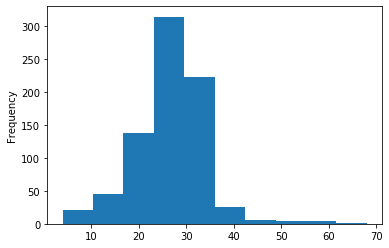

In [16]:
df_train[target_column].plot.hist();

We don't have any particularly extreme values here; indeed, that would not be possible since they are percentages and must be between 0 and 100. It seems reasonable to minimize mean squared error and stick to the original units. 

### END SOLUTION

--------

Next we'll preprocess the features. This should look fairly familiar to you, except for the preprocessing of text features. In [hw5](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/hw-solutions/hw5/hw5.ipynb) we also mixed text features with other features, but in that case we did not actually put the `CountVectorizer` directly into the `ColumnTransformer`, which I am doing here. Furthermore, there are 3 text columns and I am creating a separate `CountVectorizer` for each one. You do not need to understand every detail, but just understand generally what it does.

In [17]:
y_train = df_train[target_column]
y_test = df_test[target_column]

In [18]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

# Fit a separate CountVectorizer for each of the text columns.
# Need to convert the resulting sparse matrices to dense separately.
text_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='')),
    ('tolist', FunctionTransformer(lambda x: x.ravel(), validate=False)),
    ('countvec', CountVectorizer(max_features=10, stop_words='english')),
    ('todense', FunctionTransformer(lambda x: x.toarray(), validate=False))
])

preprocessor = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
] + [(f, text_transformer, [f]) for f in text_features])

In [19]:
preprocessor.fit(df_train);

In [20]:
def get_column_names(preprocessor):
    """
    Gets the feature names from a preprocessor.
    This entails looking at the OHE feature names and also
    the words used by the CountVectorizers.
    
    Arguments
    ---------
    preprocessor: ColumnTransformer
        A fit preprocessor following the specific format above.
    
    Returns
    -------
    list
        A list of column names.
    """
    ohe_feature_names = list(preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names(categorical_features))
    text_feature_names = [f + "_" + word for f in text_features for word in preprocessor.named_transformers_[f].named_steps['countvec'].get_feature_names()]
    return numeric_features + ohe_feature_names + text_feature_names

In [21]:
new_columns = get_column_names(preprocessor)
    
df_train_enc = pd.DataFrame(preprocessor.transform(df_train), index=df_train.index, columns=new_columns)
df_train_enc.head()

MoisturePercent  ManufacturerProvCode_AB  ManufacturerProvCode_BC  \
CheeseId                                                                      
1432             1.127656                      0.0                      0.0   
2281            -1.459684                      0.0                      0.0   
1908             2.266086                      0.0                      0.0   
2224            -1.459684                      0.0                      0.0   
2007            -0.528242                      0.0                      0.0   

          ManufacturerProvCode_MB  ManufacturerProvCode_NB  \
CheeseId                                                     
1432                          0.0                      0.0   
2281                          0.0                      0.0   
1908                          0.0                      0.0   
2224                          0.0                      0.0   
2007                          0.0                      0.0   

          ManufacturerProvCode_NL  ManufacturerProvCode_NS  \
CheeseId                                                     
1432                          0.0                      0.0   
2281                          0.0                      0.0   
1908                          0.0                      0.0   
2224                          0.0                      0.0   
2007                          0.0                      0.0   

          ManufacturerProvCode_ON  ManufacturerProvCode_PE  \
CheeseId                                                     
1432                          0.0                      0.0   
2281                          0.0                      0.0   
1908                          0.0                      0.0   
2224                          0.0                      0.0   
2007                          0.0                      0.0   

          ManufacturerProvCode_QC  ...  CharacteristicsEn_cheese  \
CheeseId                           ...                             
1432                          1.0  ...                       1.0   
2281                          1.0  ...                       0.0   
1908                          1.0  ...                       0.0   
2224                          1.0  ...                       0.0   
2007                          1.0  ...                       0.0   

          CharacteristicsEn_colored  CharacteristicsEn_creamy  \
CheeseId                                                        
1432                            0.0                       1.0   
2281                            0.0                       0.0   
1908                            0.0                       0.0   
2224                            0.0                       0.0   
2007                            0.0                       0.0   

          CharacteristicsEn_interior  CharacteristicsEn_pressed  \
CheeseId                                                          
1432                             0.0                        0.0   
2281                             0.0                        0.0   
1908                             0.0                        0.0   
2224                             0.0                        0.0   
2007                             0.0                        0.0   

          CharacteristicsEn_rind  CharacteristicsEn_ripened  \
CheeseId                                                      
1432                         0.0                        0.0   
2281                         0.0                        0.0   
1908                         0.0                        0.0   
2224                         0.0                        0.0   
2007                         0.0                        0.0   

          CharacteristicsEn_smooth  CharacteristicsEn_texture  \
CheeseId                                                        
1432                           0.0                        0.0   
2281                           0.0                        0.0   
1908                           0.0            

----------------

### Q3: initial models
rubric={points:15}

Let's compare three approaches:

1. A baseline model: choose either `DummyClassifier` or `DummyRegressor`, whichever is appropriate for this problem. 
2. A linear model: choose either `Ridge` or `LogisticRegression`, whichever is appropriate for this problem.
3. A random forest model: choose either `RandomForestClassifier` or `RandomForestRegressor`, whichever is appropriate for this problem.

For now, just use default hyperparameters.

Report the train and cross-validation score in each case. Which model performs best with default hyperparameters?

Don't violate the Golden Rule!

### BEGIN SOLUTION

The first point is to realize this is a regression problem because the target variable is continuous, so we want `DummyRegressor`, `Ridge`, and `RandomForestRegressor`.

In [22]:
pipeline_dummy = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DummyRegressor())])

scores_dummy = cross_validate(pipeline_dummy, df_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(scores_dummy)[["train_score", "test_score"]].mean()

train_score    0.000000
test_score    -0.021801
dtype: float64

In [23]:
pipeline_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge())])

scores_linear = cross_validate(pipeline_linear, df_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(scores_linear)[["train_score", "test_score"]].mean()

train_score    0.561048
test_score     0.458602
dtype: float64

In [24]:
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())])

scores_rf = cross_validate(pipeline_rf, df_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(scores_rf)[["train_score", "test_score"]].mean()

train_score    0.880548
test_score     0.534209
dtype: float64

Or, in nicer code:

In [25]:
models = {'dummy' : DummyRegressor(),
          'linear' : Ridge(),
          'random forest' : RandomForestRegressor()
         }

avg_scores = dict()
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)])
    scores = cross_validate(pipeline, df_train, y_train, cv=5, return_train_score=True)
    avg_scores[model_name] = pd.DataFrame(scores)[["train_score", "test_score"]].mean()
avg_scores_df = pd.DataFrame(avg_scores).T
avg_scores_df

train_score  test_score
dummy             0.000000   -0.021801
linear            0.561048    0.458602
random forest     0.878551    0.538744

It looks like the random forest performs best so far.

### END SOLUTION

-------------

If you used code from the course materials (lecture, homework) in the above question, please list what resources you used (e.g. "Lecture 5", "hw5"). You do not need to specify exactly which lines of code you used, just the resources you took code from.

- Resource 1
- Resource 2
- etc.

-----------

### Q4: hyperparameter tuning
rubric={points:20}

- Using an automated hyperparameter tuning method of your choice, make a reasonable attempt at tuning the hyperperameters for your linear model and random forest model. An excellent solution will also involve tuning the hyperparameters of the preprocessing steps. 
- Briefly justify your choices of which hyperparameters your tuned and what sorts of values you tried. **Max 3 sentences.**
- Briefly discuss your scores after tuning. **Max 3 sentences.**

Note: your time is limited, so there is no need to perform large searches that take a long time to run. My code for this question takes about 1.5 minutes to run on my laptop.

### BEGIN SOLUTION

I'll start with the linear regression:

In [26]:
param_grid_linear = {
    'model__alpha': [1.0, 10, 100]
}
for text_feature in text_features:
    param_grid_linear['preprocessor__' + text_feature + '__countvec__max_features'] = [10, 30, 100]

I will tune the main model parameter, `alpha`, and the number of features from each of the 3 `CountVectorizer` transformers. These seems more important to me than, say, the strategy of the imputer or the stopwords.

In [27]:
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=5, verbose=1)
grid_search_linear.fit(df_train, y_train);

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:   31.8s finished


In [28]:
grid_search_linear_results = pd.DataFrame(grid_search_linear.cv_results_).set_index("rank_test_score").sort_index()
grid_search_linear_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     0.047188      0.002855         0.016753        0.001124   
2                     0.047745      0.002935         0.018632        0.003012   
3                     0.048107      0.004229         0.016975        0.001467   
4                     0.048509      0.001438         0.017119        0.002003   
5                     0.047365      0.003724         0.016173        0.000450   

                param_model__alpha  \
rank_test_score                      
1                               10   
2                               10   
3                               10   
4                               10   
5                               10   

                param_preprocessor__CharacteristicsEn__countvec__max_features  \
rank_test_score                                                                 
1                                                              100              
2                                                              100              
3                                                              100              
4                                                              100              
5                                                               10              

                param_preprocessor__CheeseName__countvec__max_features  \
rank_test_score                                                          
1                                                               30       
2                                                              100       
3                                                               30       
4                                                              100       
5                                                              100       

                param_preprocessor__FlavourEn__countvec__max_features  \
rank_test_score                                                         
1                                                               10      
2                                                               10      
3                                                               30      
4                                                               30      
5                                                               10      

                                                            params  \
rank_test_score                                                      
1                {'model__alpha': 10, 'preprocessor__Characteri...   
2                {'model__alpha': 10, 'preprocessor__Characteri...   
3                {'model__alpha': 10, 'preprocessor__Characteri...   
4                {'model__alpha': 10, 'preprocessor__Characteri...   
5                {'model__alpha': 10, 'preprocessor__Characteri...   

                 split0_test_score  split1_test_score  split2_test_score  \
rank_test_score                                                            
1                         0.710477           0.407516           0.446779   
2                         0.700513           0.404888           0.449300   
3                         0.701668           0.400151           0.448228   
4                         0.691675           0.397827           0.451502   
5                         0.690345           0.407617           0.435410   

                 split3_test_score  split4_test_score  mean_test_score  \
rank_test_score                                                          
1                         0.643733           0.479246         0.537550   
2                         0.641099           0.487780         0.536716   
3                         0.639014           0.479699         0.533752   
4                         0.637933           0.489030         0.533593   
5                         0.635231           0.496563         0.533033   

                 std_test_score  
rank_t

Next I'll do the random forest. I'll use the same approach as for linear regression. However, the random forests are slower to train and I don't want the code to take too long, so I'll reduce the number of search cases.

In [29]:
param_grid_rf = {
    "model__n_estimators" : [10, 30, 100]
}

for text_feature in text_features:
    param_grid_rf['preprocessor__' + text_feature + '__countvec__max_features'] = [10, 100]

In [30]:
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(df_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   59.7s finished


In [31]:
grid_search_rf_results = pd.DataFrame(grid_search_rf.cv_results_).set_index("rank_test_score").sort_index()
grid_search_rf_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     1.003539      0.031796         0.029907        0.004069   
2                     1.338877      0.076499         0.028075        0.001612   
3                     0.730354      0.060206         0.025934        0.001607   
4                     0.366965      0.029828         0.033163        0.019174   
5                     1.055906      0.062091         0.028733        0.003275   

                param_model__n_estimators  \
rank_test_score                             
1                                     100   
2                                     100   
3                                     100   
4                                      30   
5                                     100   

                param_preprocessor__CharacteristicsEn__countvec__max_features  \
rank_test_score                                                                 
1                                                               10              
2                                                              100              
3                                                               10              
4                                                              100              
5                                                              100              

                param_preprocessor__CheeseName__countvec__max_features  \
rank_test_score                                                          
1                                                              100       
2                                                              100       
3                                                              100       
4                                                              100       
5                                                              100       

                param_preprocessor__FlavourEn__countvec__max_features  \
rank_test_score                                                         
1                                                              100      
2                                                              100      
3                                                               10      
4                                                               10      
5                                                               10      

                                                            params  \
rank_test_score                                                      
1                {'model__n_estimators': 100, 'preprocessor__Ch...   
2                {'model__n_estimators': 100, 'preprocessor__Ch...   
3                {'model__n_estimators': 100, 'preprocessor__Ch...   
4                {'model__n_estimators': 30, 'preprocessor__Cha...   
5                {'model__n_estimators': 100, 'preprocessor__Ch...   

                 split0_test_score  split1_test_score  split2_test_score  \
rank_test_score                                                            
1                         0.723395           0.500998           0.492636   
2                         0.731965           0.485817           0.474682   
3                         0.701379           0.468914           0.504461   
4                         0.706771           0.512179           0.476759   
5                         0.717728           0.504915           0.490050   

                 split3_test_score  split4_test_score  mean_test_score  \
rank_test_score                                                          
1                         0.649949           0.531946         0.579785   
2                         0.663595           0.528949         0.577001   
3                         0.674500           0.523763         0.574604   
4                         0.646263           0.519950         0.572385   
5                         0.637335           0.510553         0.57

The hyperparameter tuning improved the linear regression score from 

In [32]:
avg_scores_df.loc["linear", "test_score"]

0.4586020565903324

to

In [33]:
grid_search_linear_results.loc[1, "mean_test_score"]

0.5375502750606297

and the random forest score from 

In [34]:
avg_scores_df.loc["random forest", "test_score"]

0.5387439761122478

to

In [35]:
grid_search_rf_results.loc[1, "mean_test_score"]

0.5797846657332967

Overall, the random forest looks to be the best. The chosen hyerparameters are:

In [36]:
grid_search_rf.best_params_

{'model__n_estimators': 100,
 'preprocessor__CharacteristicsEn__countvec__max_features': 10,
 'preprocessor__CheeseName__countvec__max_features': 100,
 'preprocessor__FlavourEn__countvec__max_features': 100}

### END SOLUTION

----------

If you used code from the course materials (lecture, homework) in the above question, please list what resources you used (e.g. "Lecture 5", "hw5"). You do not need to specify exactly which lines of code you used, just the resources you took code from.

- Resource 1
- Resource 2
- etc.

-----------

### Q5: confidence and test set
rubric={points:10}

- For your best model from Q4, how confident are you in the score you reported? Base your answer on the sub-scores from the different folds of cross-validation. **Max 3 sentences.**
- When you are done, compute your score on the test set. Is it what you expected? Briefly discuss. **Max 3 sentences.**

### BEGIN SOLUTION

We could do a separate `cross_val_score` here, but for simplicitly I'll just look at the output of `GridSearchCV` for the 1st ranked model:

In [37]:
grid_search_rf_results.loc[1,grid_search_rf_results.columns[grid_search_rf_results.columns.str.startswith("split")]]

split0_test_score    0.723395
split1_test_score    0.500998
split2_test_score    0.492636
split3_test_score    0.649949
split4_test_score    0.531946
Name: 1, dtype: object

These scores vary a lot! So I would say, we are actually not very confident about our scores, or about this being the best model. This is likely due to the small number of examples.

Finally, let's try our model on the test set:

In [38]:
grid_search_rf.score(df_test, y_test)

0.5255701820892051

Although this is not super close to our overall cross-validation score of

In [39]:
grid_search_rf.best_score_

0.5797846657332967

it is well within the range of values we saw from the cross-validation folds, so the result seems reasonable.

### END SOLUTION

----------

If you used code from the course materials (lecture, homework) in the above question, please list what resources you used (e.g. "Lecture 5", "hw5"). You do not need to specify exactly which lines of code you used, just the resources you took code from.

- Resource 1
- Resource 2
- etc.

-----------

### Q6: feature importances
rubric={points:20}

- What are your 5 most important features according to your tuned linear model?
- What are your 5 most important features according to your tuned random forest model? 
- Do they agree with each other? Briefly discuss. **Max 3 sentences.**
- Also, briefly discuss one other aspect of the feature importances that you find interesting. **Max 3 sentences.**

Note: for the 5 most important features, it is sufficient to display these as code output rather than typing them as text, so long as they are displayed very clearly (i.e. only display those 5, don't leave them as part of a big list). 

Hint: assuming you've tuned your preprocessor, you'll want to use the `get_columns_names` function provided above because the column names may have changed during hyperparameter tuning.

### BEGIN SOLUTION

In [40]:
new_columns_linear = get_column_names(grid_search_linear.best_estimator_.named_steps['preprocessor'])

In [41]:
tuned_lr_coefs = grid_search_linear.best_estimator_.named_steps['model'].coef_
lr_coefs = pd.DataFrame(data=tuned_lr_coefs, index=new_columns_linear, columns=["Coefficient"])

The 5 most important linear regression features, by absolute value of the coefficients, are:

In [42]:
lr_coefs.loc[lr_coefs.abs().sort_values(by="Coefficient", ascending=False)[:5].index]

Coefficient
CheeseName_léger      -5.373263
MoisturePercent       -5.218202
CheeseName_damafro     4.770958
CheeseName_crème       3.965532
CheeseName_brie        2.574028

The 5 most important random forest features are:

In [43]:
new_columns_rf = get_column_names(grid_search_rf.best_estimator_.named_steps['preprocessor'])

In [44]:
tuned_rf_imps = grid_search_rf.best_estimator_.named_steps['model'].feature_importances_
rf_imps = pd.DataFrame(data=tuned_rf_imps, index=new_columns_rf, columns=["Importance"])
rf_imps.sort_values(by="Importance", ascending=False).head()

Importance
MoisturePercent               0.523820
CheeseName_damafro            0.040227
CheeseName_léger              0.032440
CategoryTypeEn_Firm Cheese    0.023843
CategoryTypeEn_Soft Cheese    0.017967

Both models have `MoisturePercent`, `CheeseName_léger` and `CheeseName_damafro` as a very important features. It seems that cheese with more moisture have less fat (I guess that makes sense) and cheeses with "léger" (meaning "light" in French) in the name also have less fat (makes sense!). I am not sure what "damafro" is but it seems to incidate more fat. For spots 4 and 5, the two models do not find the same important features.

For something interesting, we can look at more of the linear regression coefficients:

In [45]:
lr_coefs.sort_values(by="Coefficient", ascending=False)

Coefficient
CheeseName_damafro             4.770958
CheeseName_crème               3.965532
CheeseName_brie                2.574028
ManufacturerProvCode_SK        1.929272
CheeseName_feta                1.835116
...                                 ...
CheeseName_mozzarella         -1.900473
CategoryTypeEn_Hard Cheese    -2.021599
CharacteristicsEn_fat         -2.477817
MoisturePercent               -5.218202
CheeseName_léger              -5.373263

[181 rows x 1 columns]

Interestingly, the linear model picks out `CharacteristicsEn_fat` with a _negative_ coefficient - that is surprising! Let's investigate:

In [46]:
df_train["CharacteristicsEn"][df_train["CharacteristicsEn"].str.contains("fat").fillna(False)].values

array(['Popular 6% cheese called that because of its low fat content. Made from pasteurized partially skimmed milk. Smooth cheese with a few holes',
       'Available in Mozzarella - 20% milk fat, 25% milk fat, 16% milk fat, sliced',
       'Low in fat'], dtype=object)

Ah, it's because they talk about it being low fat!

### END SOLUTION

----------------

If you used code from the course materials (lecture, homework) in the above question, please list what resources you used (e.g. "Lecture 5", "hw5"). You do not need to specify exactly which lines of code you used, just the resources you took code from.

- Resource 1
- Resource 2
- etc.

-----------

### Q7: short answer questions
rubric={points:25}

The following questions are worth 5 points each. These questions refer to specific lectures or homework assignments from the second half of the course. **Max 3 sentences each.**

7(a): [**Lecture 15**](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/lectures/15_nearest-neighbours.ipynb)

Instead of trying to predict the fat content of a cheese, let's say you wanted to solve a different problem: given a query cheese, find similar cheeses in the dataset. How would you approach this problem? Would any of the code above (in this notebook) be useful for this task?

### BEGIN SOLUTION

I would first encode the features and then use nearest neighbours like we did in hw6. Thus, the feature encoding/preprocesing code above would be useful. The rest of the code, perhaps not.

### END SOLUTION

7(b): [**Lecture 16**](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/lectures/16_time-series-data.ipynb)

In [hw7](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/hw-solutions/hw7/hw7.ipynb) question 1(e) we used the current week's average avocado price as a baseline prediction for next week's avocado price. Under what circumstances would this approach yield particularly good or bad predictions of next week's avocado price?

### BEGIN SOLUTION

If the average avocado prices changes very slowly then using last week's price would give decent predictions. If it fluctuates rapidly then you would get bad predictions.

### END SOLUTION

7(c): [**Lecture 17**](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/lectures/17_survival-analysis.ipynb)

In Lecture 17 we looked at a customer churn dataset with a binary target column (yes/no) for whether a customer churned, and a `tenure` column for the length of time. In Lecture 16 we looked at the rain in Australia dataset which has a binary target column (yes/no) for whether it would rain tomorrow and a `Date` column for the time stamp. Both of these are binary classification problems, and both involve changes over time. Why did we have to worry about censoring for the churn dataset but not the rain dataset?

### BEGIN SOLUTION

For the churn dataset we have an event (churn) that eventually happens but we don't know when. Thus, at the time of our measurements, we see some un-churned customers and we don't know when they will eventually churn (censorship). In the rain dataset we simply have a sequence of days and there is no notion of waiting for something to eventually happen.

### END SOLUTION

7(d): [**Lecture 19**](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/lectures/19_outliers.ipynb)

What is the key difference between regression and classification when it comes to outliers? 

### BEGIN SOLUTION

With regression, you need to worry about outliers (extreme values) in your target values. With classification you could still have errors in your target values, but there's less of a well-defined notion of something being "extreme".

### END SOLUTION

7(e): [**Lecture 21**](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/lectures/21_communication.ipynb)

Consider the following summary I wrote of our cheese analysis, with the target audience of a CPSC 330 student:

> In this exam I worked on the [Canadian Cheese Directory dataset](https://open.canada.ca/data/en/dataset/3c16cd48-3ac3-453f-8260-6f745181c83b). I was trying to predict the fat content of a cheese based on numeric features like moisture content, categorical features like the milk type, and text features like the cheese name. I achieved a score of 0.5, which is a lot better than my baseline. And this was all using only 5 folds for cross-validation - imagine how good my model would be with 10 or even 20 folds! I also learned that soft cheeses contain a lot more fat than hard cheeses.

Critique this summary. What do you like about it, and what could be improved? Be specific.

### BEGIN SOLUTION

- Positives: Links to dataset, makes clear what the target is, gives examples for types of features.
- Negatives: What sort of score - is that $R^2$? What was the baseline? The number of folds is pretty irrelevant here. 
- Neutrals: Fine to mention the feature importances but should maybe hedge a bit... maybe "tend to contain" or "according to my model" or "causes higher predictions". Also, there is no quantification of "a lot".

### END SOLUTION

----------------

### Final checks

- [ ] Did you check [Piazza](https://piazza.com/class/k1gx4b3djbv3ph?cid=388) for any announcements or clarifications about the exam? 
- [ ] Did you complete the integrity pledge near the top of this notebook?
- [ ] Did you answer all the questions fully? (Some ask for both code and explanations.)
- [ ] Did you make note of any course materials you reused code from, after each coding question?
- [ ] Did you keep your answers within the posted length limits (usually 3 sentences)?
- [ ] Did you run your notebook from beginning to end ("Restart Kernel and Run All Cells") to make sure that your entire notebook runs properly?
- [ ] Did you push to github.students.cs.ubc.ca and then view your rendered exam in a web browser?
- [ ] Did you make sure all your code output is saved/displayed in the notebook?
- [x] Did you read this list of final checks?